In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [23]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [24]:
meas_columns = inspector.get_columns('measurement')
for column in meas_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [27]:
# View all of the classes that automap found


In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
max_date = session.query(func.max(Measurement.date)).scalar()
date_split = max_date.split("-")

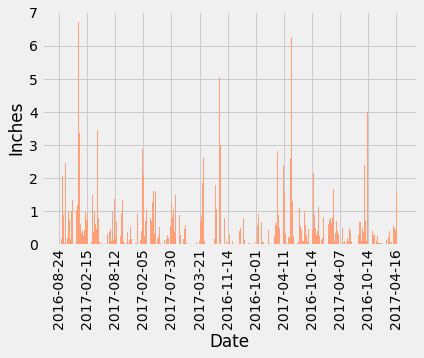

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

min_date = dt.date(int(date_split[0]), int(date_split[1]), int(date_split[2])) - dt.timedelta(days=365)






# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).\
                 filter(Measurement.date > min_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

df.sort_values(by="date")
#plot_df = df.groupby("date").sum()



dates = df.index.to_list()
precip = df["precipitation"].to_list()

labels = dates[::175]
x = 0


fig, prec = plt.subplots()
    
prec.bar(dates, precip, color="lightsalmon")

# force the location of the xticks -- monthly ticks are too many to read on the x axis.
# label with the year, instead
x_formatter = FixedFormatter(labels)
x_locator = FixedLocator([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360])

prec.xaxis.set_major_formatter(x_formatter)
prec.xaxis.set_major_locator(x_locator)


plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation=90)




plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()